<a href="https://colab.research.google.com/github/rishi-29-02/SampleSuperStore/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Retail

# Objectives
1. As a business manager, try to find out the weak areas where you can
work to make more profit.

2. What all business problems you can derive by exploring the data?

In [32]:
#from google.colab import files
#uploaded = files.upload()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [35]:
data.shape

(9994, 13)

So, we have 9994 instances and 13 features.

All the data is from United States.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [37]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


There is no missing values.

In [38]:
data.duplicated().sum()

17

So, there are 17 duplicate instances 

Let's print the duplicate instances.

In [39]:
data[data.duplicated()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


Remove all the duplicates

In [40]:
data.drop_duplicates(inplace=True)

**Explore Each feature**

Ship Mode

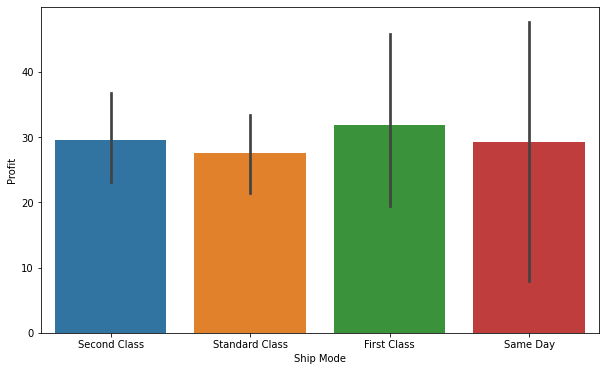

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data['Ship Mode'], data['Profit'])
plt.show()

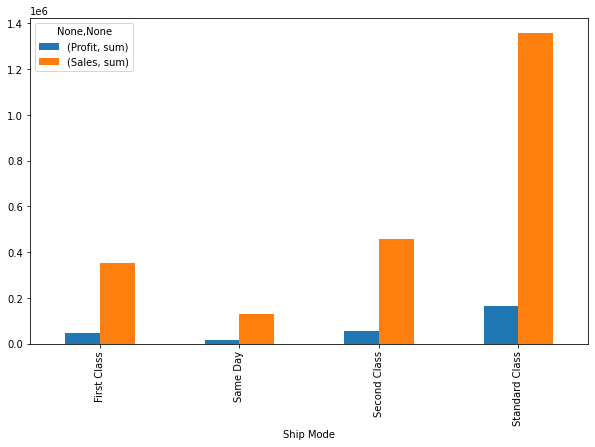

In [42]:
plt.figure(figsize=(10, 6))
fig = plt.gca()
data.groupby('Ship Mode')['Profit', 'Sales'].agg(['sum']).plot.bar(ax=fig)
plt.show()

Sales and profit are more if the shipping mode is Standard Class. 

Segment

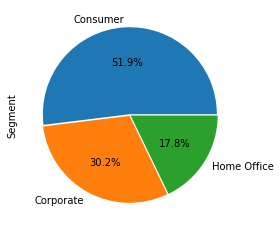

In [43]:
data['Segment'].value_counts().plot.pie(autopct='%1.1f%%', explode = [0.01, 0.01, 0.01])
plt.show()

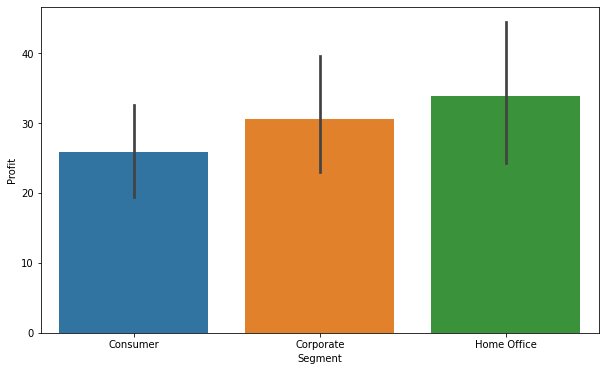

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data['Segment'], data['Profit'])
plt.show()

Selling items to Home Office and Corporate people gives us more profit. 

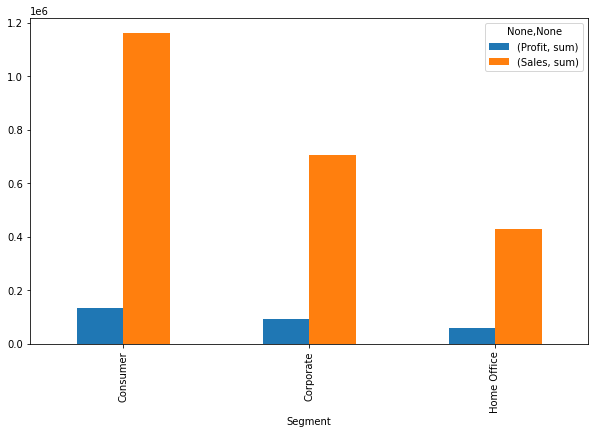

In [45]:
plt.figure(figsize=(10, 6))
fig = plt.gca()
data.groupby('Segment')['Profit', 'Sales'].agg(['sum']).plot.bar(ax=fig)
plt.show()

Maximum customer are general consumer not from the Corporate or the Home Office. 

State

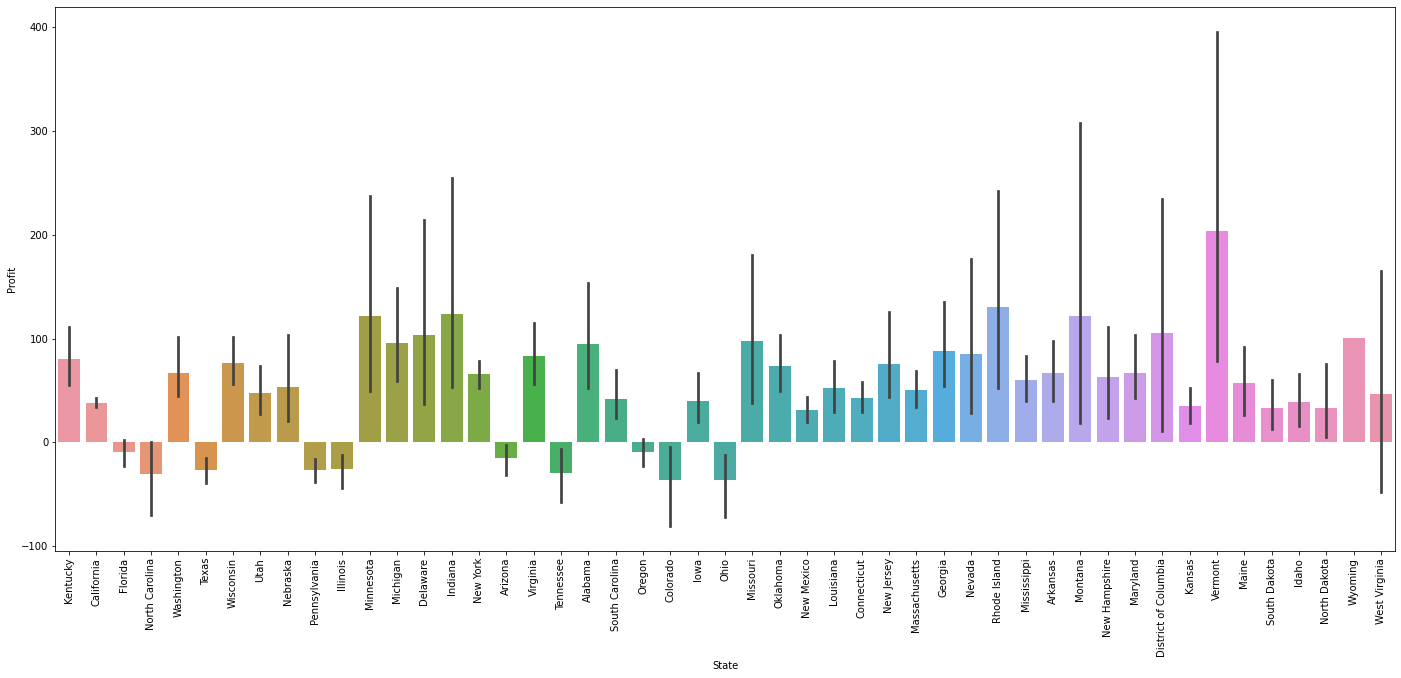

In [46]:
plt.figure(figsize=(24, 10))
sns.barplot(data['State'], data['Profit'])
plt.xticks(rotation=90)
plt.show()

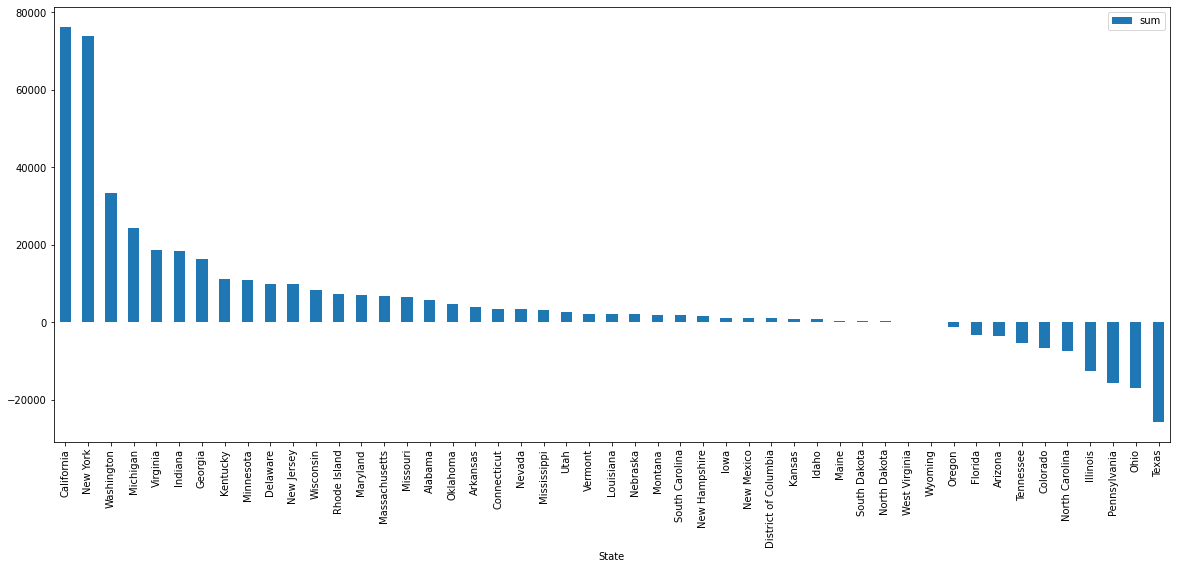

In [47]:
plt.figure(figsize=(20, 8))
fig = plt.gca()
data.groupby('State')['Profit'].agg(['sum']).sort_values('sum', ascending=False).plot.bar(ax=fig)
plt.show()

Business is in profit in California, New York.

But, Business is in loss in Texas, Ohio.

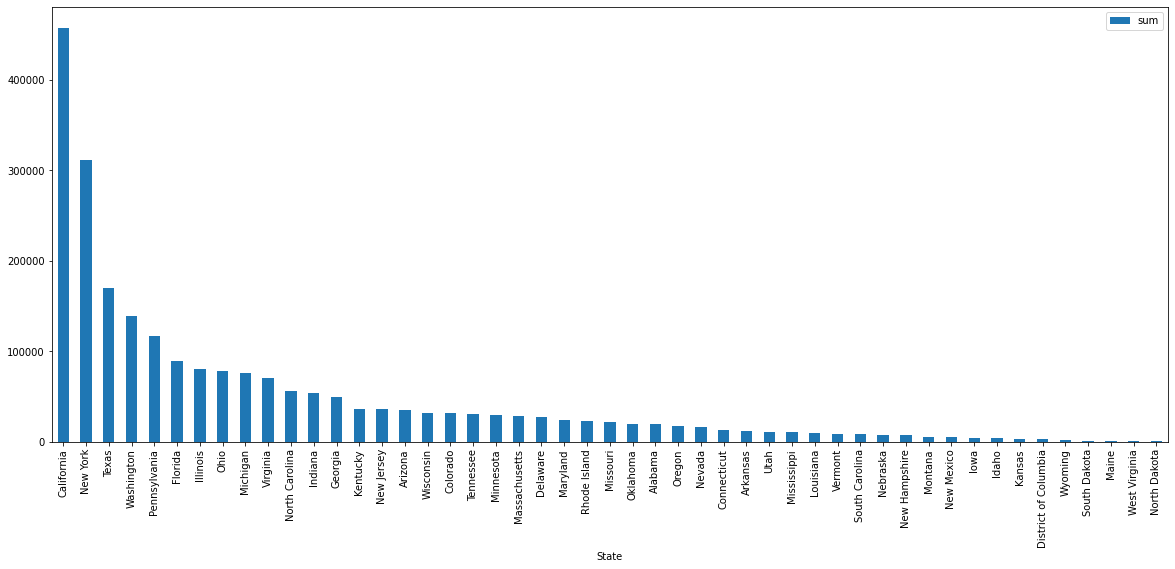

In [48]:
plt.figure(figsize=(20, 8))
fig = plt.gca()
data.groupby('State')['Sales'].agg(['sum']).sort_values('sum', ascending=False).plot.bar(ax=fig)
plt.show()

From above, we see that sales is maximim in California and New York and we are earning profit there,

But Sales Texas is third maximum in all States in US but the business is in loss.

Region

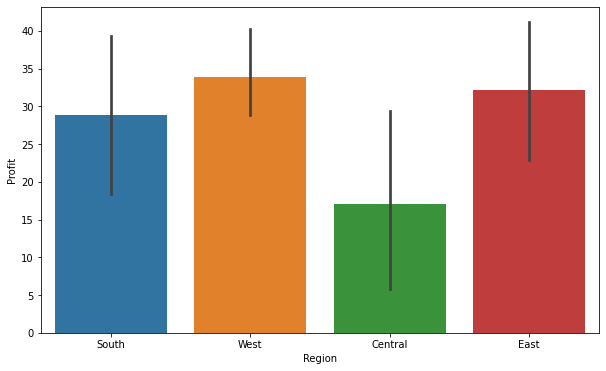

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data['Region'], data['Profit'])
plt.show()

Profit is maximum in the west region but less in the Central and South region.

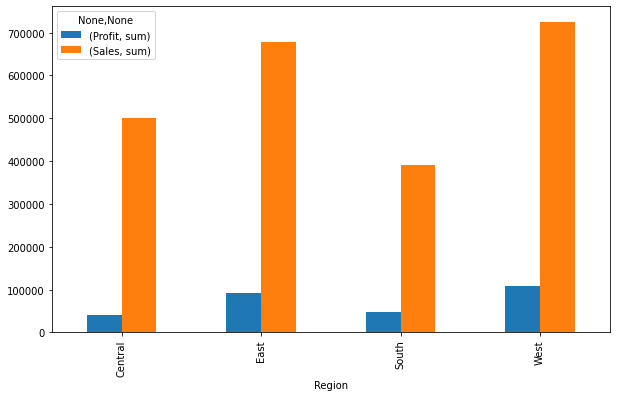

In [50]:
plt.figure(figsize=(10, 6))
fig = plt.gca()
data.groupby('Region')['Profit', 'Sales'].agg(['sum']).plot.bar(ax=fig)
plt.show()

Sales is also less in the central and South region

Category

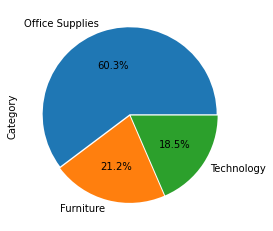

In [51]:
data['Category'].value_counts().plot.pie(autopct='%1.1f%%', explode = [0.01, 0.01, 0.01])
plt.show()

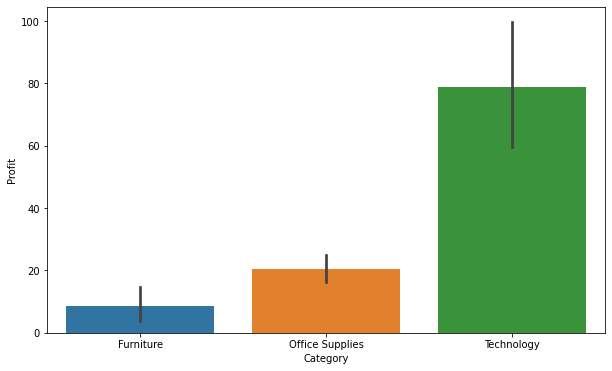

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(data['Category'], data['Profit'])
plt.show()

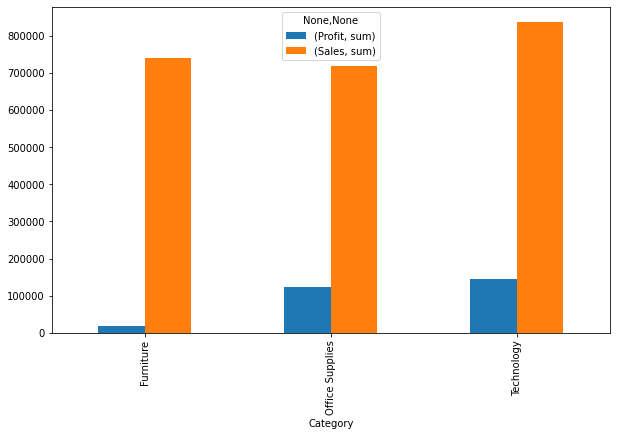

In [53]:
plt.figure(figsize=(10, 6))
fig = plt.gca()
data.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar(ax=fig)
plt.show()

Technology records the highest sales among the three.

Sub-Category

In [54]:
data[['Category', 'Sub-Category']].groupby(['Category', 'Sub-Category']).last()

Empty DataFrame
Columns: []
Index: [(Furniture, Bookcases), (Furniture, Chairs), (Furniture, Furnishings), (Furniture, Tables), (Office Supplies, Appliances), (Office Supplies, Art), (Office Supplies, Binders), (Office Supplies, Envelopes), (Office Supplies, Fasteners), (Office Supplies, Labels), (Office Supplies, Paper), (Office Supplies, Storage), (Office Supplies, Supplies), (Technology, Accessories), (Technology, Copiers), (Technology, Machines), (Technology, Phones)]

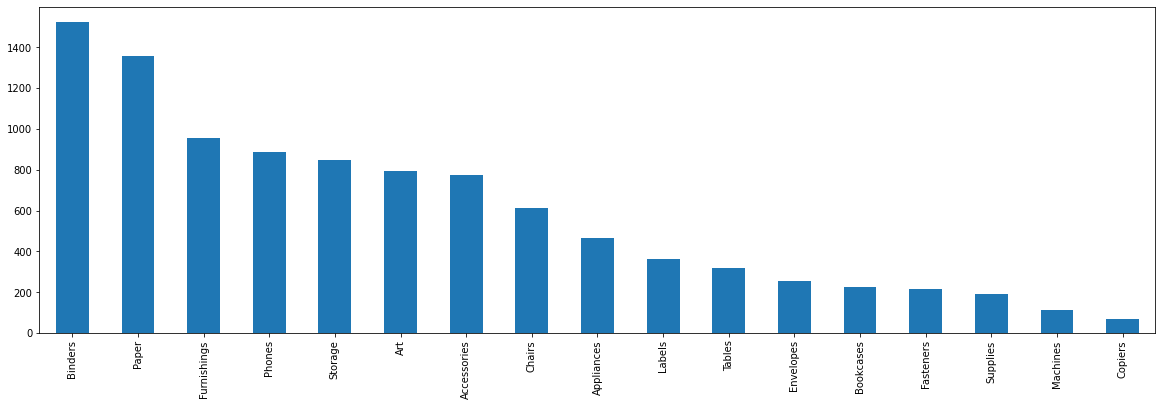

In [55]:
plt.figure(figsize=(20, 6))
ax = plt.gca()
data['Sub-Category'].value_counts().plot.bar(ax=ax)
plt.show()

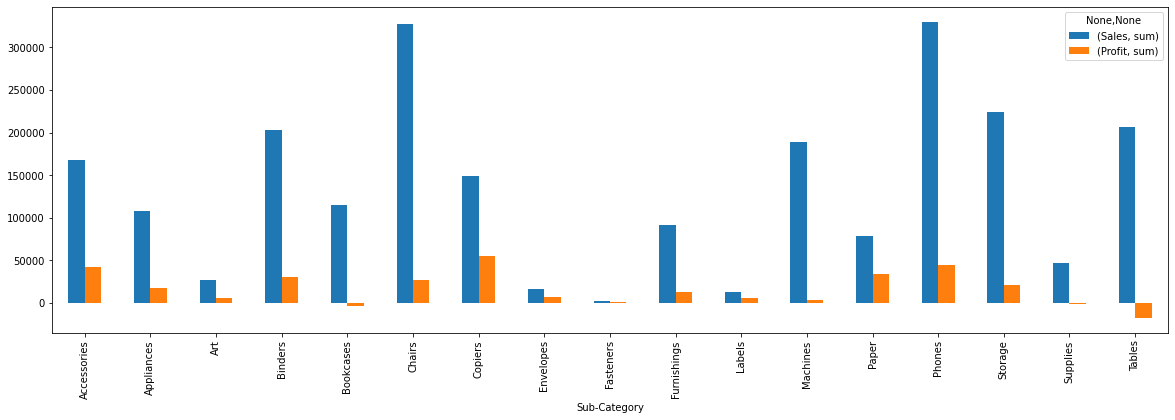

In [56]:
plt.figure(figsize=(20, 6))
ax = plt.gca()
data.groupby('Sub-Category')['Sales', 'Profit'].agg(['sum']).plot.bar(ax=ax)
plt.show()

From the above plot we infer that there is a loss in the case of Tables an Bookcases.

Fasteners, Labels and Art are rarely sold.

Quantity

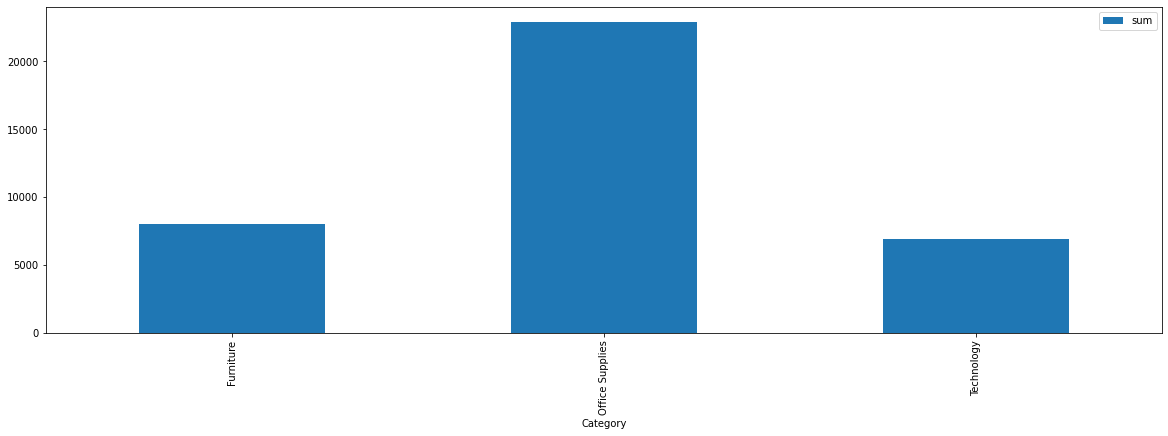

In [57]:
plt.figure(figsize=(20, 6))
ax = plt.gca()
data.groupby('Category')['Quantity'].agg(['sum']).plot.bar(ax=ax)
plt.show()

Office Supplies are ordered in the highest Quantities.

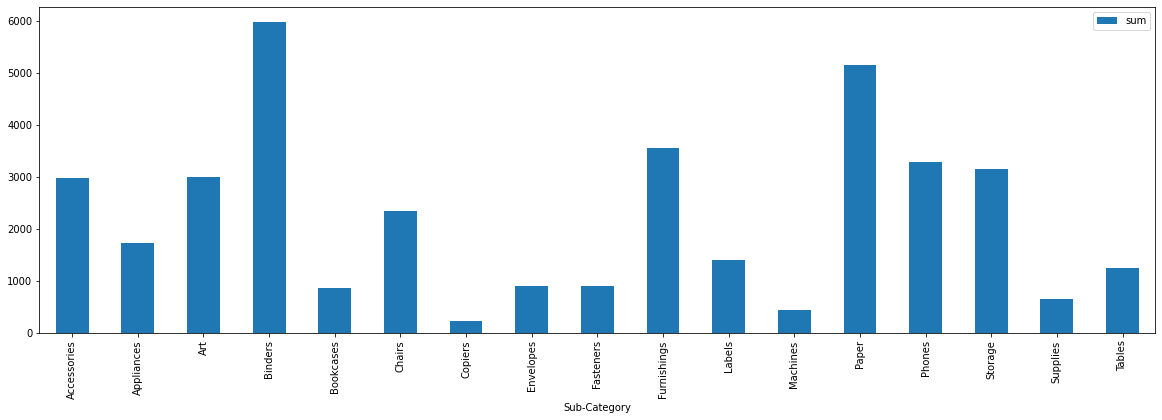

In [58]:
plt.figure(figsize=(20, 6))
ax = plt.gca()
data.groupby('Sub-Category')['Quantity'].agg(['sum']).plot.bar(ax=ax)
plt.show()

Blinders, Furnishings, Paper, Phones and Storage are ordered in the highest quntity.

Conclusions:

1. Sales and profit are more if the shipping mode is Standard Class.

2. Selling items to Home Office and Corporate people gives us more profit. 

3. Maximum customer are general consumer not from the Corporate or the Home Office.

4. Business is in profit in California, New York. But, Business is in loss in Texas, Ohio.

5. From above, we see that sales is maximim in California and New York and we are earning profit there, But Sales Texas is third maximum in all States in US but the business is in loss.

6. Profit is maximum in the west region but less in the Central and South region. Sales is also less in the central and South region.

7. After analyzing the sub category, we infer that there is a loss in the case of Tables an Bookcases. Fasteners, Labels and Art are rarely sold.

8. Office Supplies are ordered in the highest Quantities but others are very less.